<a href="https://colab.research.google.com/github/K-3620/Keras-model/blob/main/%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.models import Model,Sequential
from keras.layers import Input,Dense,LSTM,Bidirectional
from keras import backend as K
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM 

In [2]:
data = pd.read_csv('/content/drive/My Drive/데이터수집/2010년부터10년치데이터.csv',index_col=0)
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,7540,7820,7480,7520,177197,-0.007916
2010-01-05,7490,7580,7350,7500,214314,-0.002660
2010-01-06,7500,7500,7320,7350,81874,-0.020000
2010-01-07,7350,7420,7200,7210,106474,-0.019048
2010-01-08,7220,7330,7220,7240,61393,0.004161
...,...,...,...,...,...,...
2020-10-21,20200,20500,19850,20100,402212,-0.009852
2020-10-22,19850,20050,19000,19200,620779,-0.044776
2020-10-23,19500,20600,19350,19800,567794,0.031250


In [3]:
target = data['Close']

In [4]:
list(target.values)[-1]

17500

In [5]:
aa=[]

aa.extend(list(target.values[1:-1]))
aa.append('17500')
aa.append('0')
len(aa)

2669

In [6]:
len(target.values[1:-1])

2667

In [7]:
from pandas import Series

y_target= pd.DataFrame(data=aa,index=target.index,columns=['Close'])
y_target  # 그 다음날 종가

,Close
Date,
2010-01-04,7500
2010-01-05,7350
2010-01-06,7210
2010-01-07,7240
2010-01-08,7100
...,...
2020-10-21,19200
2020-10-22,19800
2020-10-23,17100


In [8]:
x_data = data[['Open','High','Low','Volume']] # 학습
y_data = y_target # 답

In [9]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

x_datas = StandardScaler().fit_transform(x_data)
y_datas = StandardScaler().fit_transform(y_data)

In [10]:
# 데이터 분리하기
x_train = x_datas[:2160]
x_test = x_datas[2160:]

y_train = y_datas[:2160]
y_test = y_datas[2160:]

In [11]:
y_train.shape

(2160, 1)

In [12]:
x_train.shape

(2160, 4)

In [13]:
x_train = x_train.reshape((2160,-1,4))

In [14]:
x_train.ndim

3

In [15]:
x_test = x_test.reshape((509,-1,4))
# y_test = y_test.reshape((509,-1,1))

In [16]:
x_test.shape,y_test.shape

((509, 1, 4), (509, 1))

In [63]:
# 모델 구성
model = Sequential()

# model.add(Dense(units=1024, input_dim=4, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1))

model.add(LSTM(64,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [64]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [65]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=1)

hist = model.fit(x_train,y_train,epochs=100,batch_size=16,callbacks=[es])

Epoch 1/100
135/135 [==============================] - 0s 2ms/step - loss: 0.1345 - mae: 0.2517
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0051 - mae: 0.0516
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0417
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0413
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0412
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0405
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0400
Epoch 8/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0421
Epoch 9/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0406
Epoch 10/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0398
Epoch 11/100
135/135 [=================

In [55]:
res = model.evaluate(x_test,y_test,batch_size=16)

32/32 [==============================] - 0s 1ms/step - loss: 0.3270 - mae: 0.2399


In [66]:
y_hat = model.predict(x_test)

In [38]:
x_test.shape,y_hat.shape,y_test.shape

((509, 1, 4), (509, 1), (509, 1))

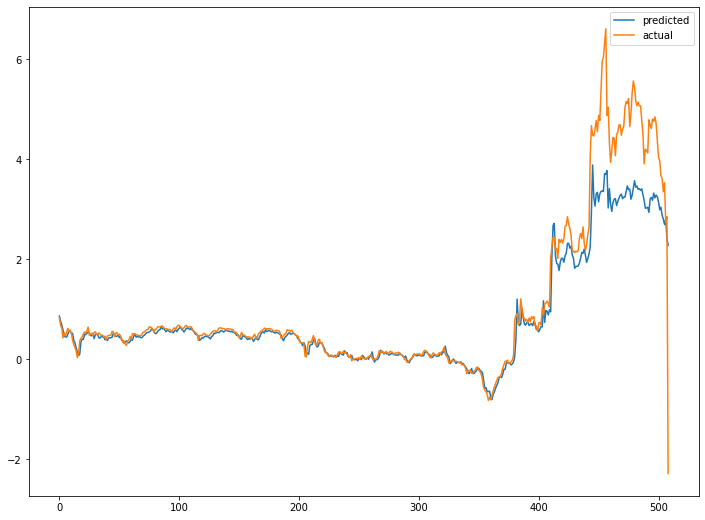

In [67]:
plt.figure(figsize=(12,9))
plt.plot(y_hat, label = "predicted")
plt.plot(y_test,label = "actual")
plt.legend()
plt.show()